# CHAPTER 15: Proximal and Mirror-Descent Methods

### This code runs simulations for Example 9 and generates figure 3 from Chapter 15:  Proximal and Mirror-Descent Methods (vol I)
TEXT: A. H. Sayed, INFERENCE AND LEARNING FROM DATA, Cambridge University Press, 2022.

<div style="text-align: justify">
DISCLAIMER:  This computer code is  provided  "as is"   without  any  guarantees.
Practitioners  should  use it  at their own risk.  While  the  codes in  the text 
are useful for instructional purposes, they are not intended to serve as examples 
of full-blown or optimized designs. The author has made no attempt at optimizing 
the codes, perfecting them, or even checking them for absolute accuracy. In order 
to keep the codes at a level  that is  easy to follow by students, the author has 
often chosen to  sacrifice  performance or even programming elegance in  lieu  of 
simplicity. Students can use the computer codes to run variations of the examples 
shown in the text. 
</div>

The Jupyter notebook and python codes are developed by Semanur Avşar 

Required Libraries:

1. numpy
2. matplotlib

Required Functions:

1. generate_logistic
2. logistic_minimizer
3. risk_value
4. gradP
5. project_simplex

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from generate_logistic import generate_logistic
from logistic_minimizer import logistic_minimizer
from risk_value import risk_value
from gradP import gradP
from project_simplex import project_simplex

## *Example 15.9 - Mirror descent under negative entropy*

Combining the results of Examples$~15.7$ and$~15.8$, we can simplify the mirror-descent recursion ($15.103$) for the case when the mirror function is  the negative entropy function ($15.84$) and when the sets ${\cal C}$ and ${\cal C}_{\phi}$ correspond to the simplex and the positive orthant, respectively.  The result is shown in listing ($15.110$), where the notation $\ln(x)$ and $\mbox{exp}(x)$ for a vector $x$ refers to vectors where the $\ln$ and exp functions are applied elementwise. 
 
 
$$
\begin{array}{l}
\hline
\textbf{Online mirror-descent for minimizing $E(w)$ subject to $w\in{\cal C}$}\\
\textbf{using a negative  entropy mirror function.}\\\hline\hline
\text{given convex and smooth function $E(w)$};\\ 
\text{let $\phi(w):{\cal C}_{\phi}\rightarrow \mathbb{R}$ be the negative entropy function ($15.84$);}\\
\text{let ${\cal C}$ be the simplex ($15.104$) and ${\cal C}_{\phi}$ the positive orthant ($15.105$);}\\
\text{given gradient operator $\nabla_{w^T}\,E(w)$};\\
\text{start from an initial condition;},\;w_{-1}\in{\cal C}'={\cal C}\cap{\cal C}_{\phi}.\\
\textbf{repeat until convergence over } n \geq 0:\\
\quad\;\;\vert \;\; b_n= \mathbb{1}_M + \ln(w_{n-1})-\mu\nabla_{w^T}\,E(w_{n-1})\\
\quad\;\;\vert\;\;z_n = \mbox{exp}\{b_n-\mathbb{1}_M\}\\
\quad\;\;\vert\;\; w_n = z_n/\|z_n\|_1\\
\quad \textbf{end}\\
\quad\text{return } w^{\star} \leftarrow w_n.\\\hline
\end{array} \quad \text{(15.110)}
$$ 

 

We can simplify the expression for $z_n$ in ($15.110$) by eliminating $b_n$ and noting that

$$
z_n = \exp\left\{\ln(w_{n-1}) - \mu\nabla_{w^T}E(w_{n-1})\right\} \\
   = w_{n-1} \odot \exp\left\{-\mu\nabla_{w^T}E(w_{n-1})\right\} \quad \text{(15.111)}
$$


in terms of the Hadamard (elementwise) product. If we denote the individual entries of $w_n$ by $w_{n,m}$, we find that the mapping from the entries $\{w_{n-1,m}\}$ to $\{w_{n,m}\}$ in the mirror-descent construction ($15.110$) is given by

$$
w_{n,m}=\frac{w_{n-1,m}\,\mbox{exp}\Bigl\{-\mu \,\partial E(w_{n-1})/\partial w_{m}\Bigr\}}{\sum_{m'=1}^{M} w_{n-1,m'}\,\mbox{exp}\Bigl\{-\mu\, \partial E(w_{n-1})/\partial w_{m'}\Bigr\}}\, \quad \text{(15.112)}
$$

for $m=1,2,\ldots, M$.
 
 
We illustrate the operation of the online mirror-descent algorithm ($15.110$) and the projected gradient algorithm ($15.51$) by considering the $\ell_2-$regularized logistic regression risk function:

$$
E(w) = \rho\|w\|^2 + \frac{1}{N}\sum_{m=0}^{N-1}
\ln\left(1 + e^{-\gamma(m) h_m^T w}\right) \quad \text{(15.113)}
$$

For this simulation, the data $\{\gamma(m),h_m\}$ are generated randomly as follows. First, a $10$th-order random parameter model $w^a\in\mathbb{R}^{10}$ is selected, and $N=200$ random feature vectors $\{h_m\}$ are generated, say, with zero-mean unit-variance Gaussian entries. Then, for each $h_m$, the label $\gamma(m)$ is set to either $+1$ or $-1$ according to the following construction:

$$
\gamma(m) = 
\begin{cases} 
+1 & \text{if } \left(\dfrac{1}{1+e^{-h_m^T w^a}}\right) \geq 0.5 \\
-1 & \text{otherwise}
\end{cases} \quad \text{(15.114)}
$$


The algorithms are run  for $10,000$ iterations on the data $\{\gamma(m),h_m\}$ using parameters

$$
\rho=2,\;\;\mu=0.001 \quad \text{(15.115)}
$$

The projection onto the simplex, which is necessary for running the projected gradient algorithm, is implemented according to the description in Prob.$~9.11$.  The resulting weight iterates are shown in the bottom plot of Fig.$~15.3$; the minimal risk is found to be

$$
E(w^{\star})\approx 0.6903 \quad \text{(15.116)}
$$

The two plots in the top row display the learning curves $E(w_n)$ relative to the minimum value $E(w^{\star})$, both in linear scale on the left and in normalized logarithmic scale on the right (according to construction ($11.65$). The results indicate faster convergence of the projected gradient method for this simulation; nevertheless, each step of the algorithm requires the evaluation of a projection onto the simplex whereas the computations involved in the mirror-descent implementation ($15.110$) are more straightforward.

fraction of +1 in generated data; desirable to be close to 0.5
0.46
wait...generating data
limit point and w-star
[[0.09925848]
 [0.10803178]
 [0.09208557]
 [0.10582756]
 [0.10448632]
 [0.09100488]
 [0.09981326]
 [0.09916468]
 [0.09536862]
 [0.10495884]] [[-0.00153745]
 [ 0.00670973]
 [-0.00893944]
 [ 0.00365994]
 [ 0.00351101]
 [-0.00539359]
 [ 0.00377402]
 [ 0.00301774]
 [-0.00653711]
 [ 0.00599257]]
minimum risk value
[[0.69254004]]


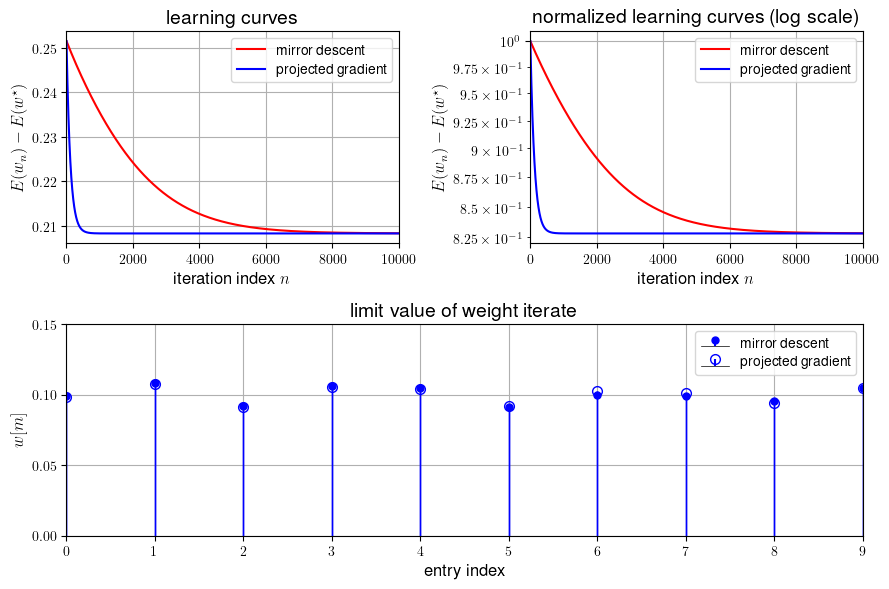

In [4]:
#################################################################################
# Runs EXAMPLE 9 (Mirror descent under negative entropy)
# generates figure 3
#################################################################################

# l2-regularized logistic empirical risk
# P(w) = rho\|w\|^2 + (1/N) sum_{n=0}^{N-1} ln(1+exp(-gamma(n)h_n'w))

rho = 2    # regularization parameter
mu = 0.001 # step-size

M = 10    # size of feature vectors
N = 200   # number of data points
L = 10000  # number of gradient-descent iterations

# generating data with a model in the simplex (nonnegative entries that add
# up to one
zo = np.random.rand(M).reshape(-1,1) # randomly chosen parameter for logistic model
zo = zo/np.sum(zo)
p, gamma_vec, H = generate_logistic(N,zo,0) # generates logistic data
print('fraction of +1 in generated data; desirable to be close to 0.5')
print(p) # desirable to be close to 0.5
print('wait...generating data')
ws, Ps, thetas = logistic_minimizer(rho, gamma_vec, H, 0) # minimizer and minimum risk value

epsilon=1e-6
w = np.random.rand(M,1)+epsilon # initial condition for mirror descent
w = w/np.sum(w) # nonnegative entries that add up to one
wpg = w.copy() # initial condition for projected gradient

P = np.zeros(L).reshape(-1,1) # risk values
P2 = np.zeros(L).reshape(-1,1) # risk values for projected gradient

for n in range(L):
#    if n % 100 == 0: #uncomment these lines if you want to see the progress
#        print(n)
    
    # Mirror descent
    P[n] = risk_value(H, gamma_vec, w, rho)
    g = gradP(H, gamma_vec, w, rho)  # initial gradient vector
    b = np.ones((M, 1)) + np.log(w) - mu * g
    z = np.exp(b - np.ones((M, 1)))
    w = z / np.linalg.norm(z, 1)
    
    # Projected gradient
    P2[n] = risk_value(H, gamma_vec, wpg, rho)
    g2 = gradP(H, gamma_vec, wpg, rho)  # initial gradient vector
    wx = wpg - mu * g2
    wpg = project_simplex(wx)  # project onto the simplex

print('limit point and w-star')
print(w, ws)

print('minimum risk value')
print(Ps)

# Figure 3 (Learning curves)

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": "Helvetica",
})

plt.figure(figsize=(9, 6))


plt.subplot(221)
plt.plot(range(L), P - Ps, 'r', range(L), P2 - Ps, 'b')  # learning curve
plt.xlabel('iteration index $n$', fontsize=12)
plt.ylabel('$E(w_n)-E(w^{\star})$', fontsize=12)
plt.title('learning curves', fontsize=14)
plt.legend(['mirror descent', 'projected gradient'])
plt.xlim([0, L])
plt.grid()

X = (P - Ps) + 1e-20  # added a small perturbation to avoid log(0)
X2 = (P2 - Ps) + 1e-20  # added a small perturbation to avoid log(0)

plt.subplot(222)
plt.semilogy(range(L), X / max(X), 'r', range(L), X2 / max(X2), 'b')  # learning curve
plt.xlabel('iteration index $n$', fontsize=12)
plt.ylabel('$E(w_n)-E(w^{\star})$', fontsize=12)
plt.title('normalized learning curves (log scale)', fontsize=14)
plt.legend(['mirror descent', 'projected gradient'])
plt.xlim([0, L])
plt.grid()


plt.subplot(212)
                                          
markerline, stemlines, baseline = plt.stem(w, markerfmt='bo', linefmt='b', basefmt='k', label='mirror descent')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
markerline.set_markersize(5) # make the circles smaller to match with the book
markerline, stemlines, baseline = plt.stem(wpg, markerfmt='bo', linefmt='b', basefmt='k', label='projected gradient')
stemlines.set_linewidth(1)
baseline.set_linewidth(0.5)
markerline.set_markersize(7)
markerline.set_markerfacecolor('none') # make the squares hollow to match with the book
plt.xlabel('entry index', fontsize = 12)
plt.ylabel('$$w[m]$$', fontsize = 12)
plt.title('limit value of weight iterate', fontsize = 14)
plt.legend()
plt.xlim([0, 9])
plt.ylim([0, 0.15])
plt.yticks(np.arange(0, max(w)+0.05 , step=0.05))
plt.grid()

plt.tight_layout()
plt.savefig('fig3-ch15.pdf', format='pdf')
plt.show()

**Figure 15.3** (*Top*) Learning curves $E(w_n)$ relative to the minimum risk value $E(w^{\star})$ in linear scale (on the left) and in normalized logarithmic scale (on the right) generated by the projected gradient and mirror-descent algorithms ($15.51$) and ($15.110$), respectively. (*Bottom*) Limiting value of the weight iterate $w_n$, which tends to the minimizer $w^{\star}$.